In [1]:
%run imports/VacuumGauge_functions.ipynb
%run imports/rbflayer.py

import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [10]:
df_delta = pd.read_csv('data/datasets/df_delta.csv') # cointains labels for delta VG
df_ok = pd.read_csv('data/datasets/df_ok.csv')  #contains labels for ok VG

df_raw = pd.read_csv('data/datasets/df_raw.csv') ## contains full reading of each VG

df_labels = pd.concat([df_ok, df_delta], sort=False, axis=0)


df_VG = pd.merge(df_raw, df_labels, on =['gauge_id','fillNumber'])
df_VG = df_VG.set_index(['gauge_id','fillNumber'], drop=True)

## Removing categorical values
df_VG.y.replace(to_replace=['ok', 'delta'], value=[0, 1], inplace=True)

X = np.array(df_VG.iloc[:, :-1])
y = np.array(df_VG.iloc[:, -1])

from sklearn.model_selection import StratifiedKFold

strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Random Forest

In [2]:
## definire funzione generica per facilitare la comparison dei risultati

name = ''
model_dir = 'data/models/random_forest'
model_version = 'forest_006.pkl'
scoring_list = ['recall', 'accuracy', 'precision']
n_results = -1
model_path = os.path.join(model_dir, model_version)



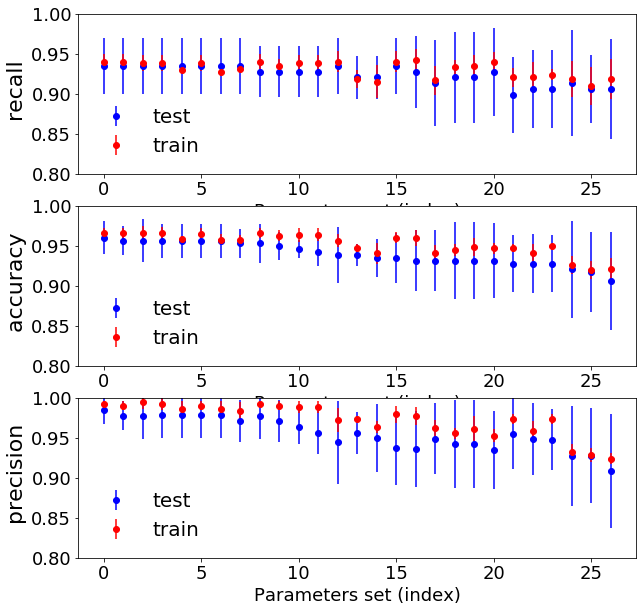

In [4]:
results, model = plot_score (model_dir, model_version, scoring_list=scoring_list,
                      sort_scoring='accuracy', n_results=30, name='')

In [5]:
results.iloc[0]

mean_fit_time                                                              2.51349
std_fit_time                                                              0.127938
mean_score_time                                                           0.415813
std_score_time                                                           0.0650137
param_forest__bootstrap                                                      False
param_forest__max_leaf_nodes                                                     4
param_forest__n_estimators                                                     150
param_kmeans__n_clusters                                                       100
param_preprocessor__log_scale                                                False
params                           {'forest__bootstrap': False, 'forest__max_leaf...
split0_test_recall                                                        0.892857
split1_test_recall                                                        0.892857
spli

In [ ]:
## Logisti Regression

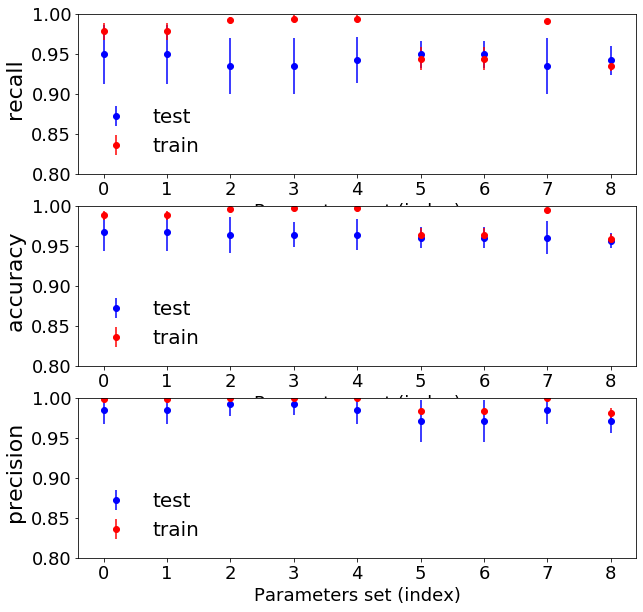

In [24]:
## definire funzione generica per facilitare la comparison dei risultati

name = ''
model_dir = 'data/models/logistic_classifier'
model_version = 'logistic_004.pkl'
scoring_list = ['recall', 'accuracy', 'precision']
n_results = -1
model_path = os.path.join(model_dir, model_version)

results, logistic = plot_score (model_dir, model_version, scoring_list=scoring_list,
                      sort_scoring='accuracy', n_results=-1, name='')

In [15]:
results.iloc[0]['params']

{'kmeans__n_clusters': 30, 'logistic__penalty': 'l1'}

## KNN

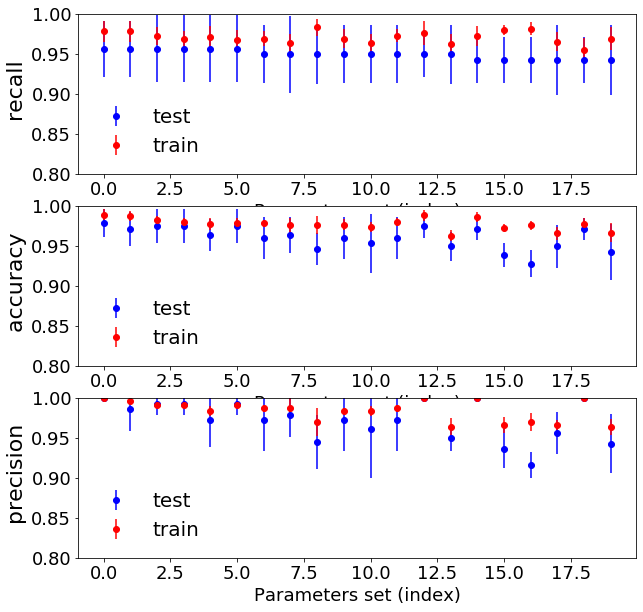

In [7]:
name = ''
model_dir = 'data/models/knn'
model_version = 'knn_003.pkl'
scoring_list = ['recall', 'accuracy', 'precision']
n_results = -1
model_path = os.path.join(model_dir, model_version)

results, knn = plot_score (model_dir, model_version, scoring_list=scoring_list,
                           sort_scoring='recall', n_results=20, name='')


## CNN

In [6]:
import pandas as pd
import numpy as np
name = ''
model_dir = 'data/models/cnn'
model_version = 'cnn_005.csv'


model_path = os.path.join(model_dir, model_version)
cv_results = pd.read_csv(model_path)
for key in cv_results: 
    print('{} = {:.2f} +/- {:.2f}'.format(key, np.mean(cv_results[key]), np.std(cv_results[key])))

loss = 0.10 +/- 0.03
accuracy = 0.97 +/- 0.01
precision = 0.98 +/- 0.01
recall = 0.96 +/- 0.01
val_loss = 0.14 +/- 0.04
val_accuracy = 0.96 +/- 0.02
val_precision = 0.96 +/- 0.02
val_recall = 0.95 +/- 0.02


In [4]:
results['params']

0     {'filters': 50, 'layers': 1}
1    {'filters': 100, 'layers': 1}
2     {'filters': 10, 'layers': 1}
Name: params, dtype: object

## Models Evaluation

In [25]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(logistic.best_estimator_, X, y, cv=strat_kfold,
                             method='decision_function')

In [26]:
from sklearn.metrics import precision_recall_curve

precision, recalls, tresholds = precision_recall_curve(y, y_scores)

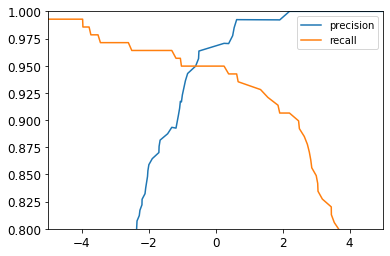

In [32]:
plt.plot(tresholds, precision[:-1], label='precision')
plt.plot(tresholds, recalls[:-1], label='recall')
plt.xlim(-5, 5)
plt.ylim(0.8, 1)
plt.legend()
plt.show()

In [60]:

X_raw = np.array(df_raw.drop(index=df_VG.index))

In [58]:
df_VG.shape
6232 - 278


5954

In [64]:
y_pred = logistic.best_estimator_.predict(X_raw)
y_proba = logistic.best_estimator_.predict_proba(X_raw)

In [43]:
np.sum(y_pred)
np.where(y_pred)
10/40

(array([  11,   12,   13, ..., 6288, 6289, 6321]),)

[0.00109888 0.99890112]


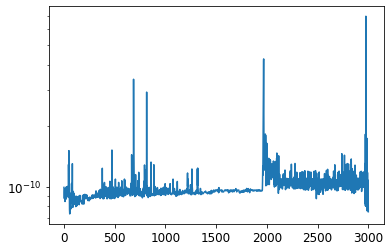

[0.0013589 0.9986411]


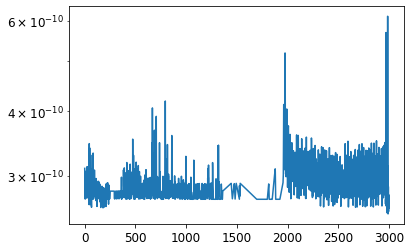

[0.04894349 0.95105651]


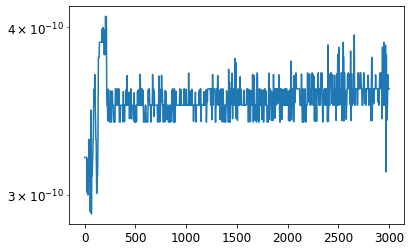

[0.49183768 0.50816232]


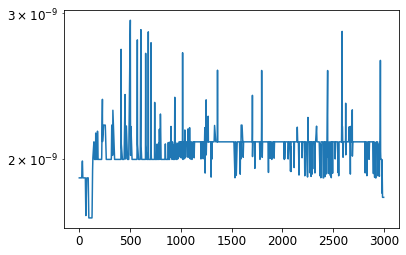

[0.34976033 0.65023967]


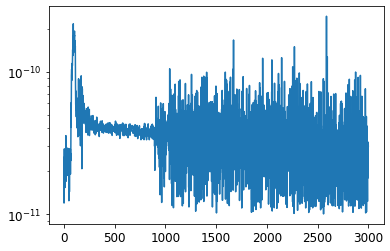

[0.07891062 0.92108938]


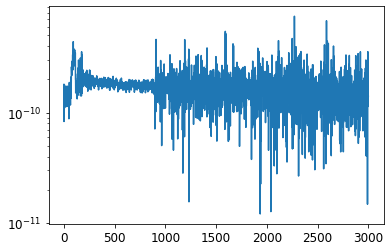

[5.90687620e-04 9.99409312e-01]


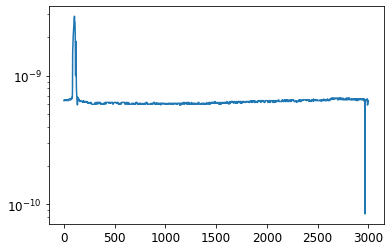

[0.46494625 0.53505375]


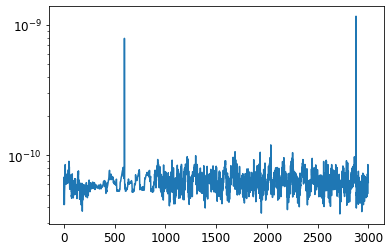

[0.46725842 0.53274158]


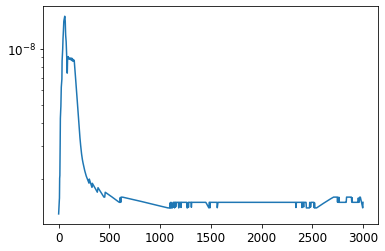

[0.44251731 0.55748269]


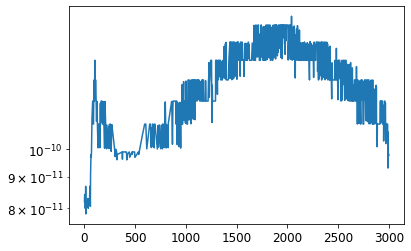

[0.00625108 0.99374892]


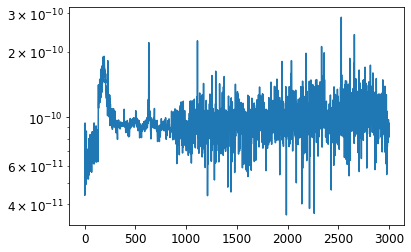

[0.36251181 0.63748819]


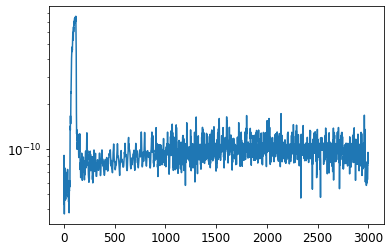

[0.0309997 0.9690003]


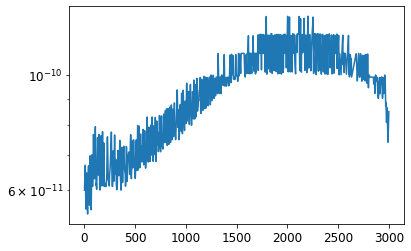

[0.48855205 0.51144795]


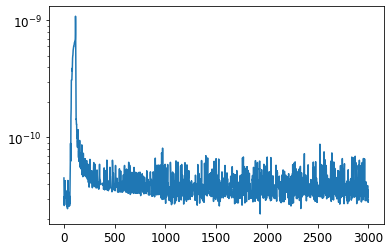

[0.02899299 0.97100701]


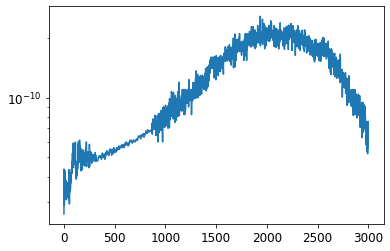

[0.08728406 0.91271594]


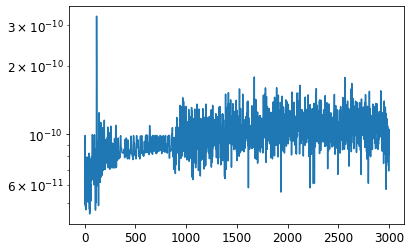

[0.34350373 0.65649627]


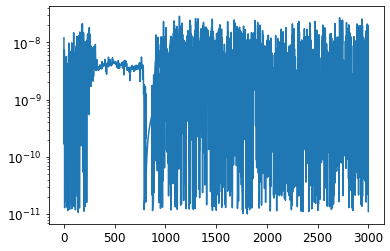

[0.02790313 0.97209687]


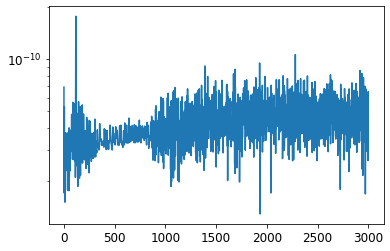

[0.34616216 0.65383784]


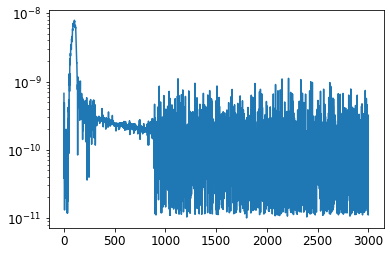

[0.12372542 0.87627458]


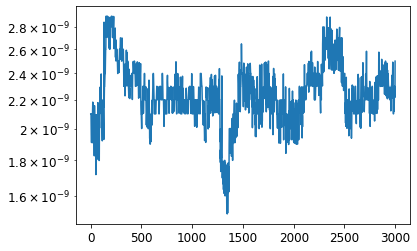

[0.36504969 0.63495031]


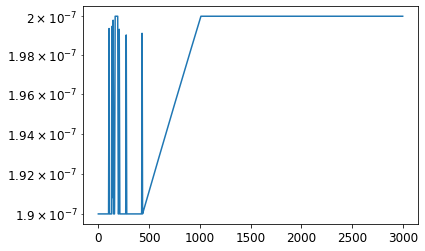

[8.05313799e-05 9.99919469e-01]


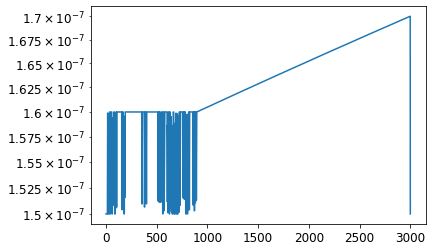

[0.33210895 0.66789105]


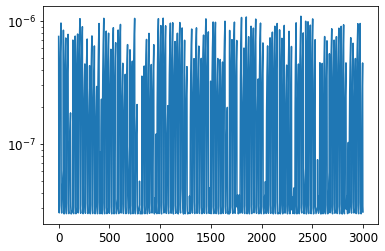

[0.2173878 0.7826122]


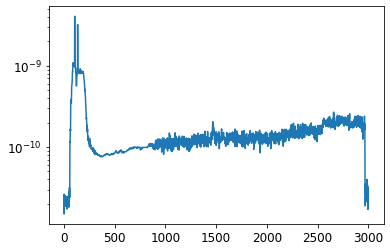

[0.00130333 0.99869667]


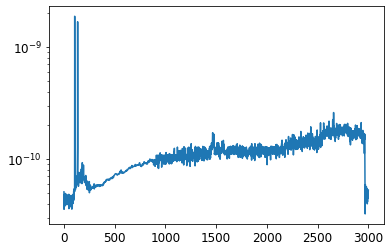

[0.38537826 0.61462174]


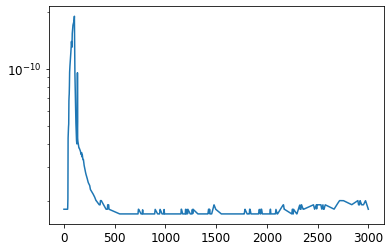

[0.22717984 0.77282016]


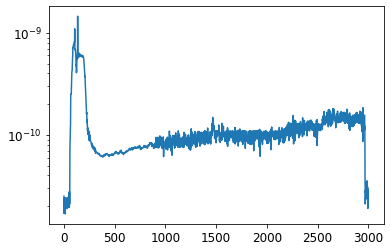

[0.00130863 0.99869137]


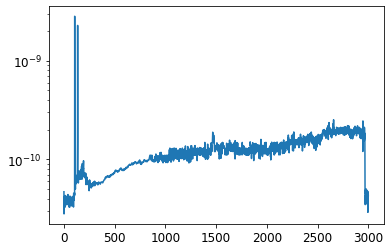

[0.18051527 0.81948473]


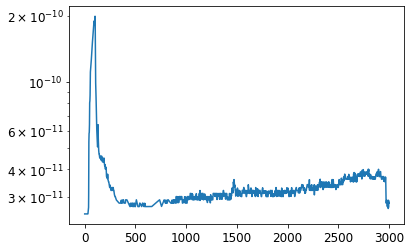

[0.01943566 0.98056434]


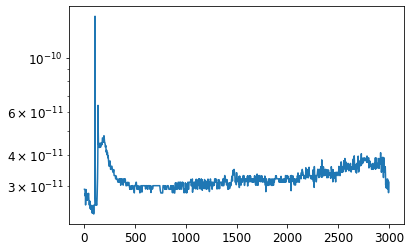

[0.40309868 0.59690132]


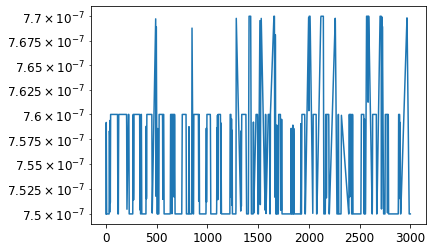

[3.79680901e-05 9.99962032e-01]


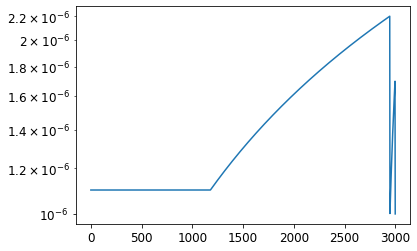

[0.36974048 0.63025952]


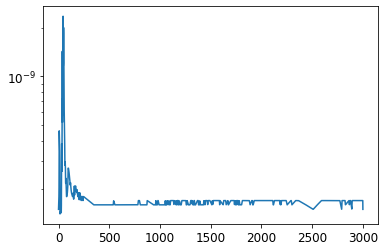

[0.49381638 0.50618362]


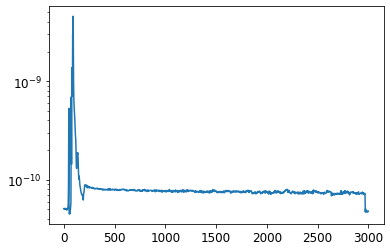

[0.20814604 0.79185396]


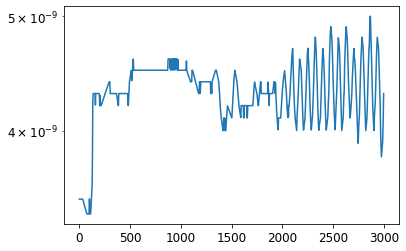

[0.47793606 0.52206394]


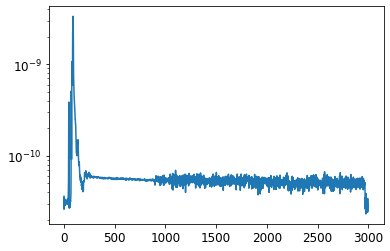

[0.17347621 0.82652379]


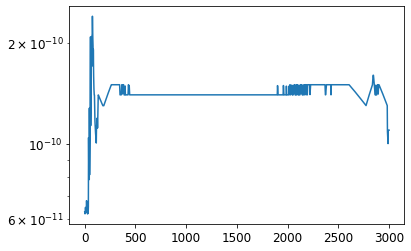

[0.48216305 0.51783695]


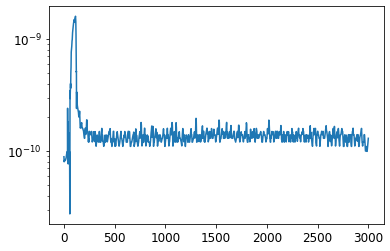

[0.00444548 0.99555452]


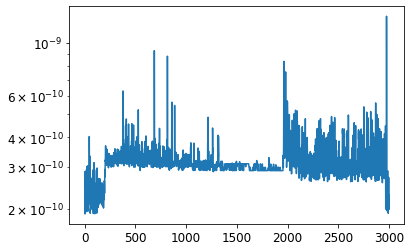

[0.08090311 0.91909689]


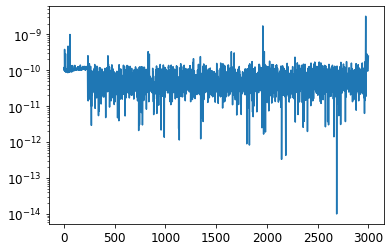

[0.41112783 0.58887217]


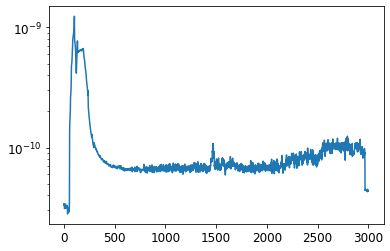

[0.00220516 0.99779484]


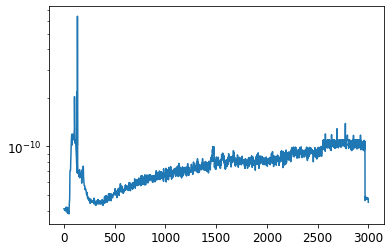

[0.01088545 0.98911455]


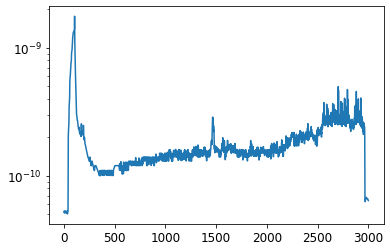

[0.05438806 0.94561194]


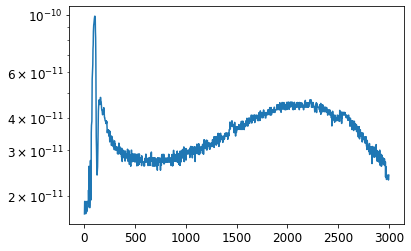

[0.37590697 0.62409303]


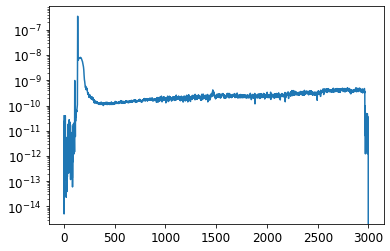

[0.47761461 0.52238539]


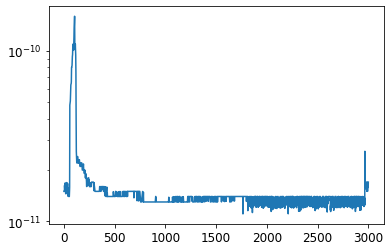

[0.05058619 0.94941381]


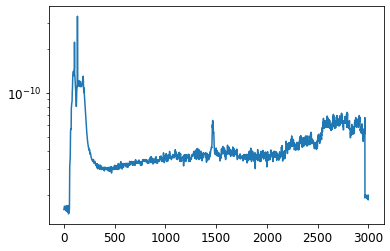

[0.10860625 0.89139375]


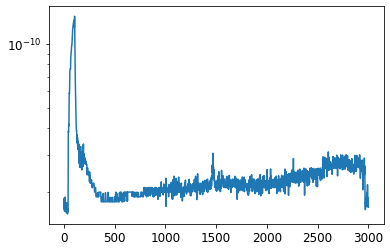

[0.24805451 0.75194549]


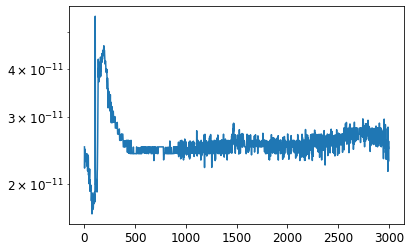

[0.34726848 0.65273152]


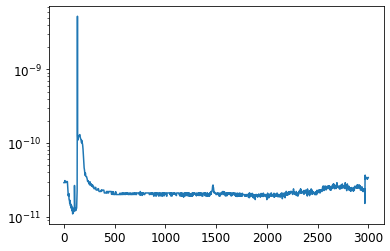

In [65]:
for i in np.where(y_pred)[0][-50:]:
    print(y_proba[i])
    plt.plot(range(3000), X_raw[i])
    plt.yscale('log')
    plt.show()

1030